# Template - Boosting

Task - Mushroom Classification

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


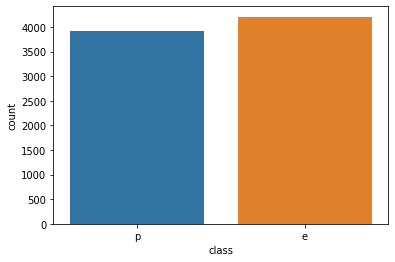

In [4]:
sns.countplot(data=df,x='class') # Check if dataset is balanced i.e. contain approx. equal samples from each class

In [6]:
df.describe().transpose() # Categorical Data - Identify unique categories in each feature

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text major ticklabel objects>)

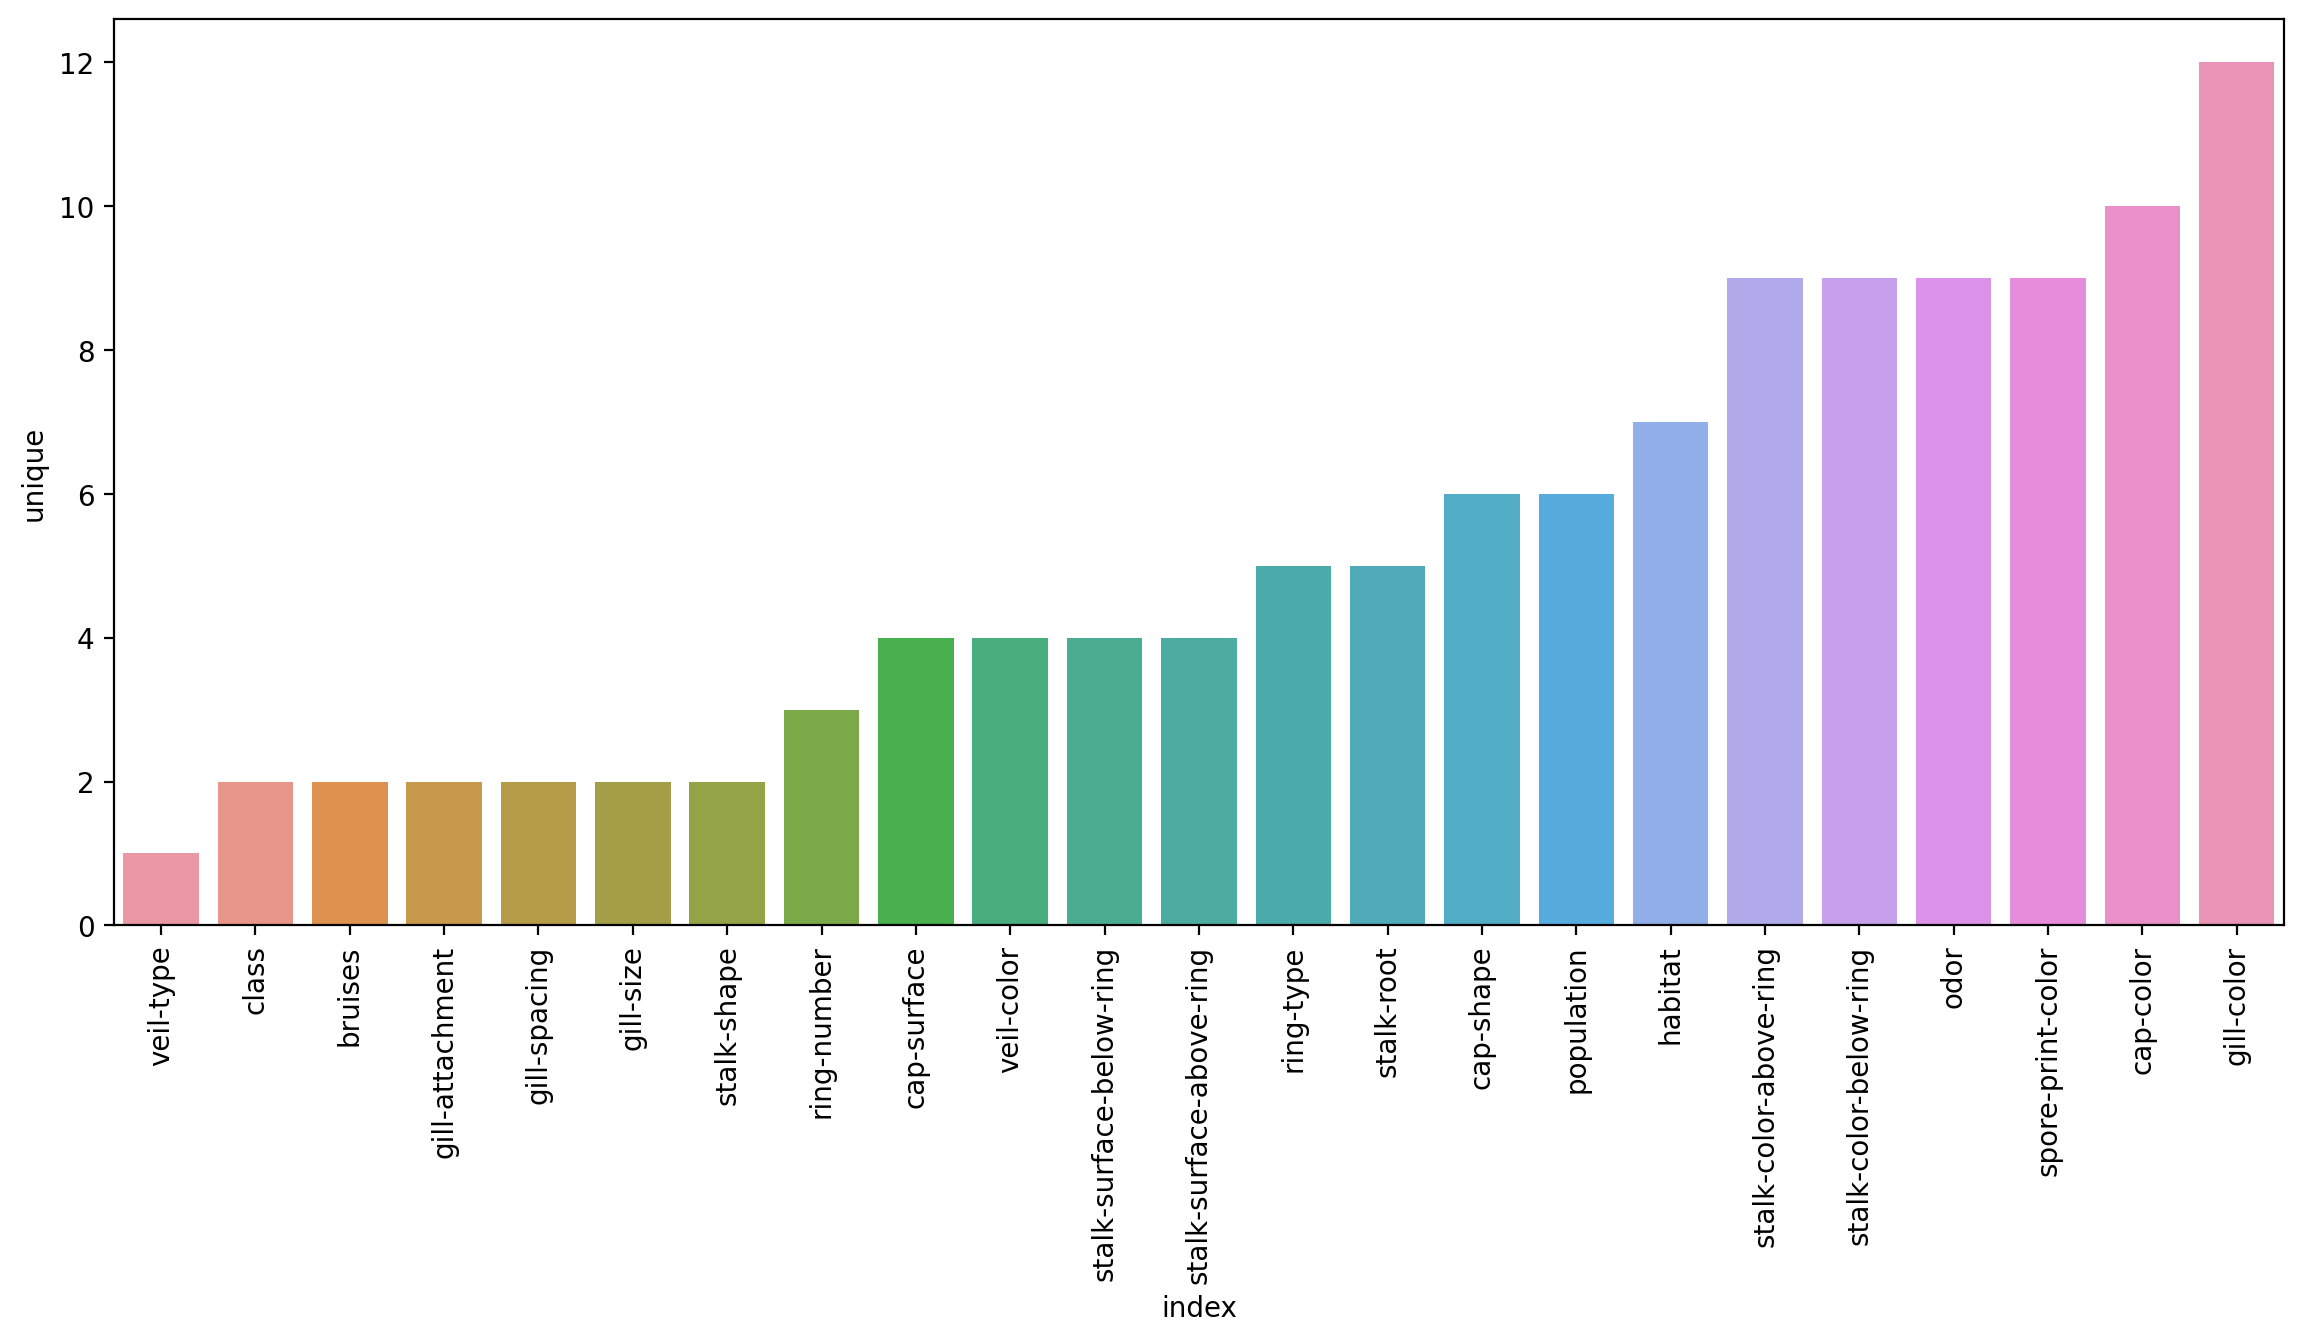

In [8]:
# Plot representation of unique categories per feature
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90)

# Adaboost

In [9]:
# Dataset Preparation

from sklearn.model_selection import train_test_split

X = df.drop('class',axis=1)
X = pd.get_dummies(X,drop_first=True)
y =  df['class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=100)

In [14]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators = 20) # using only one model
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=20)

In [15]:
# Evaluate performance of model

from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

predictions = model.predict(X_test)

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       615
           p       1.00      1.00      1.00       604

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [21]:
# Identify the features used by the weak classifier

feats = pd.DataFrame(index=X.columns, data = model.feature_importances_,columns=['Importance'])
imp_feats = feats[feats['Importance']>0]                   
print(imp_feats)

                            Importance
cap-color_w                       0.05
odor_c                            0.05
odor_f                            0.05
odor_n                            0.15
odor_p                            0.05
gill-spacing_w                    0.05
gill-size_n                       0.15
stalk-shape_t                     0.05
stalk-surface-above-ring_k        0.05
ring-type_p                       0.05
spore-print-color_r               0.05
spore-print-color_w               0.10
population_c                      0.05
population_v                      0.10


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

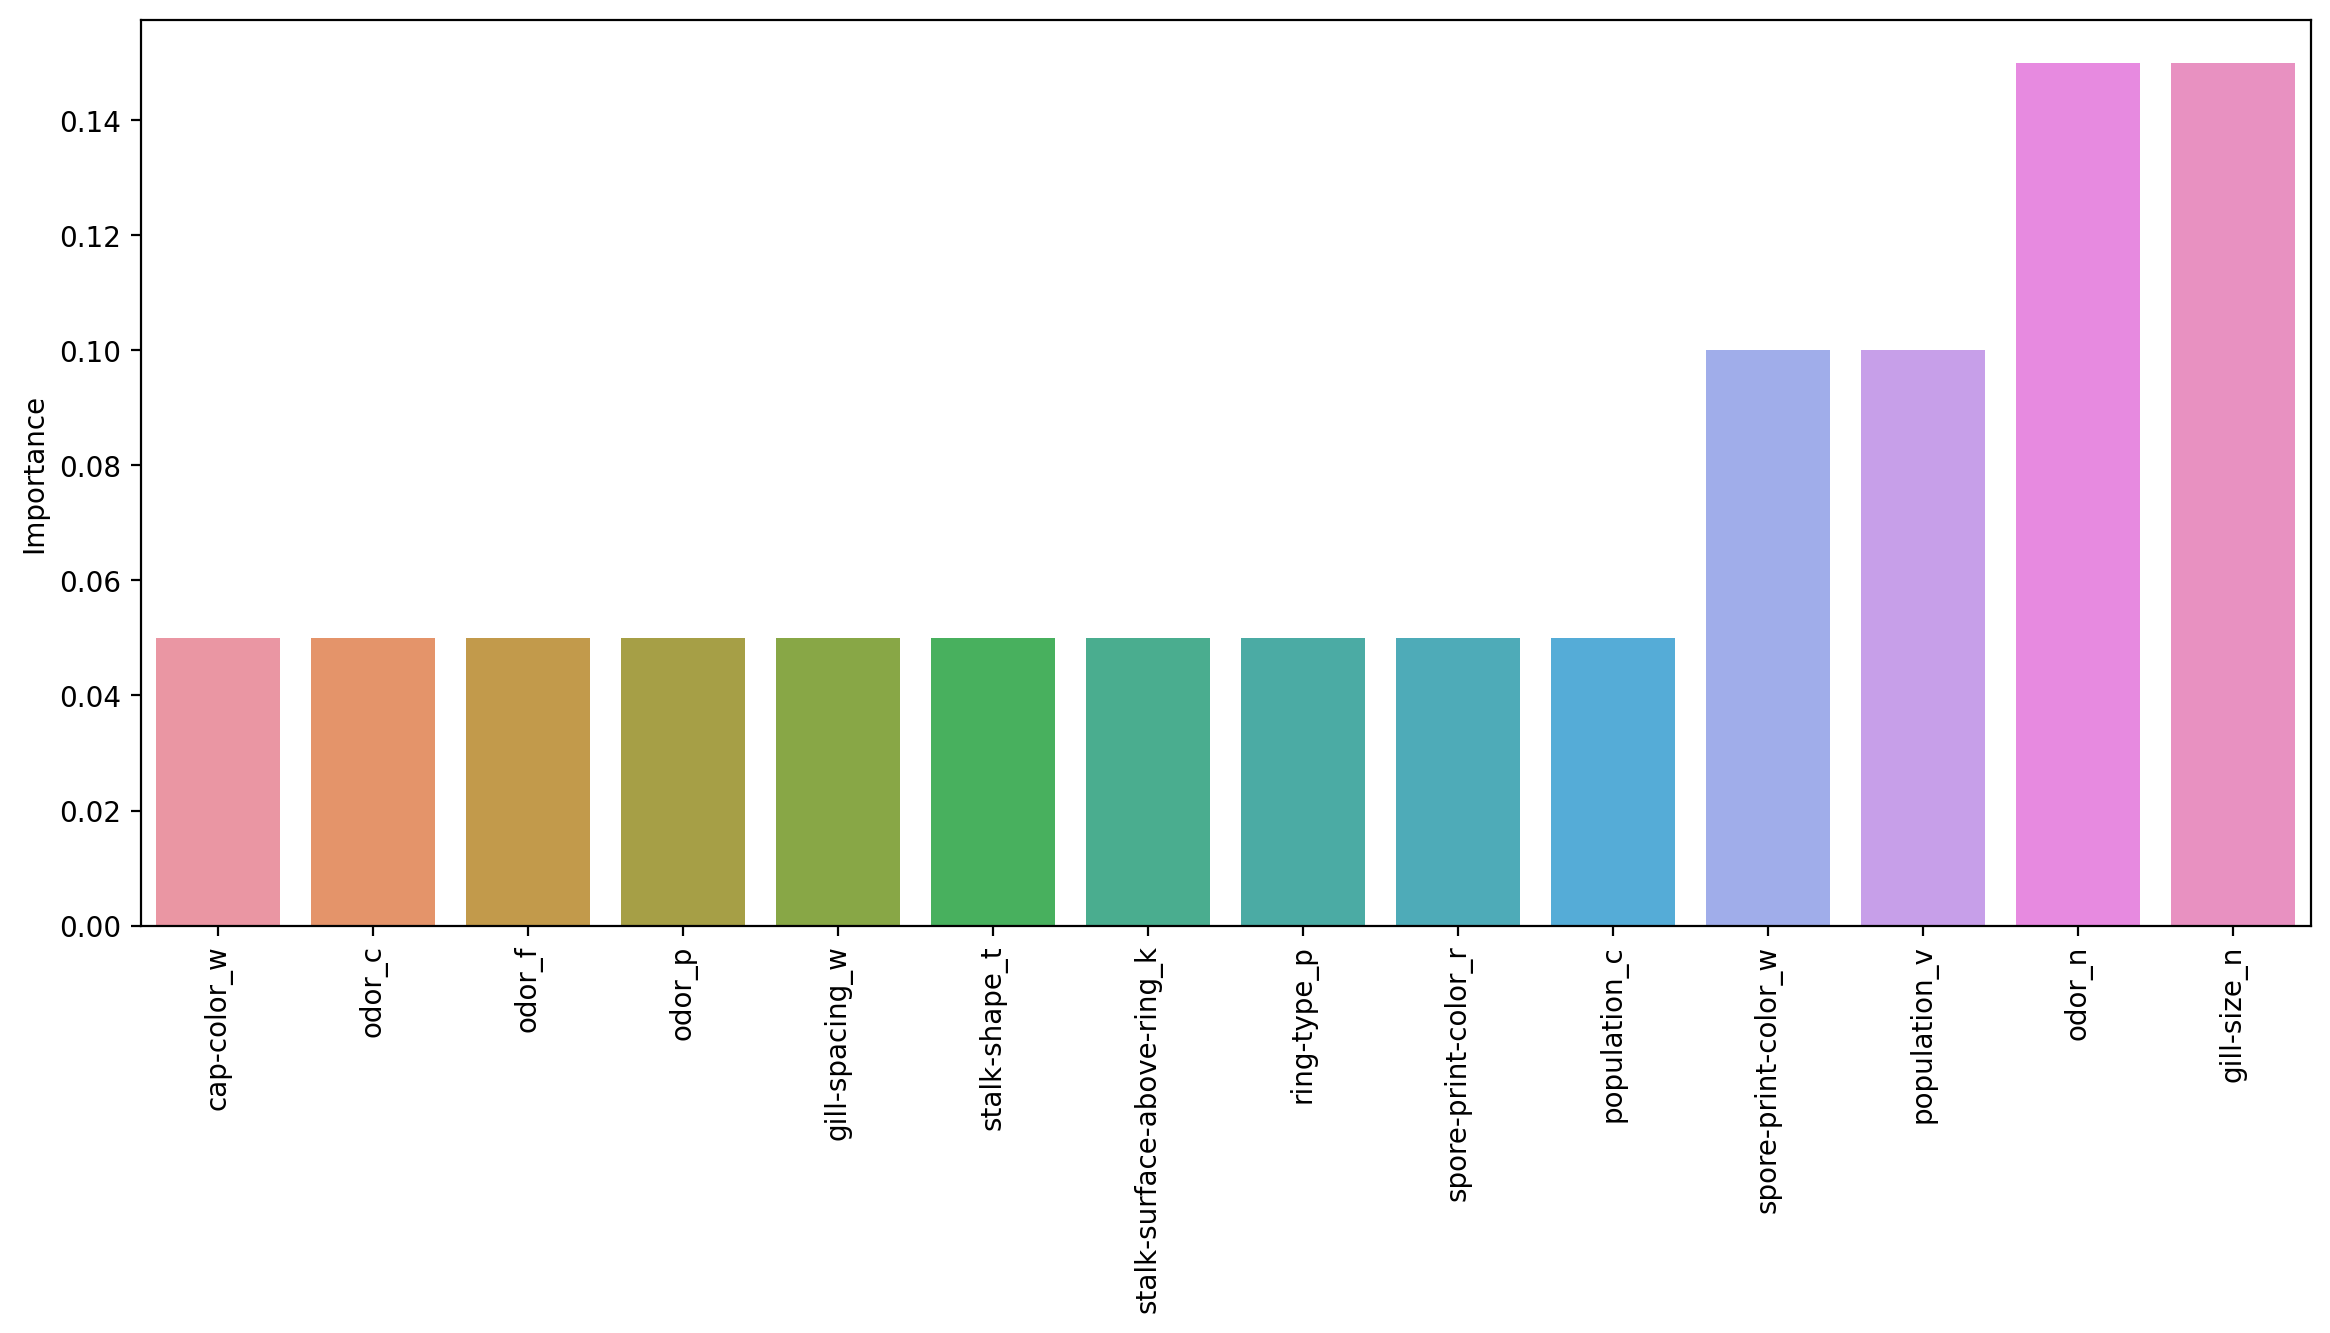

In [24]:
# Plot
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90)

# Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth' :[3,4,5,6]}
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model,param_grid)

In [27]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [29]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [30]:
predictions = grid.predict(X_test)

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       615
           p       1.00      1.00      1.00       604

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [32]:
feat_imp = grid.best_estimator_.feature_importances_

In [34]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_imp,columns=['Importance']).sort_values("Importance",ascending=False)
print(imp_feats)

                          Importance
odor_n                      0.611373
stalk-root_c                0.138057
bruises_t                   0.053322
stalk-root_r                0.052865
spore-print-color_r         0.033275
...                              ...
stalk-color-below-ring_o    0.000000
stalk-color-below-ring_p    0.000000
cap-color_w                 0.000000
veil-color_w                0.000000
habitat_w                   0.000000

[95 rows x 1 columns]
